# ***Kaggle case***: The complete pokemon dataset

| Name                       | NIU     |
| -------------------------- | ------- |
| Levon Kesoyan Galstyan     | 1668018 |

My Kaggle project will use the dataset from [The Complete Pokemon Dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon/data), which includes data on all Pokémon from the first seven generations, totaling 800 Pokémon. This dataset contains various details, from names and Pokédex numbers to types, stats, and more. This provides a rich amount of data, with 41 columns (features) in total.

The goal is to predict whether a given Pokémon is legendary based on its characteristics. To achieve this, we’ll work with the dataset, split it into training and testing sets, handle any missing values, and more.

### Let's take an initial look at our dataset and examine which features we have:

| Variable          | Definition                                                | Key                                                 | Type       |
|-------------------|-----------------------------------------------------------|-----------------------------------------------------|------------|
| `name`            | The Pokémon's English name                                |                                                     | Categorical  |
| `japanese_name`   | The Pokémon's original Japanese name                      |                                                     | Categorical  |
| `pokedex_number`  | National Pokédex entry number                             |                                                     | Numeric    |
| `percentage_male` | Percentage of the species that are male                   | Blank if genderless                                 | Numeric    |
| `type1`           | Primary type                                              | e.g., Grass, Fire                                   | Categorical  |
| `type2`           | Secondary type                                            | e.g., Flying, Poison                                | Categorical  |
| `classification`  | Classification in the Sun and Moon Pokédex                |                                                     | Categorical  |
| `height_m`        | Height in meters                                          |                                                     | Numeric    |
| `weight_kg`       | Weight in kilograms                                       |                                                     | Numeric    |
| `capture_rate`    | Capture rate                                              |                                                     | Numeric    |
| `base_egg_steps`  | Steps to hatch                                            |                                                     | Numeric    |
| `abilities`       | List of abilities                                         |                                                     | Categorical  |
| `experience_growth` | Experience growth rate                                  |                                                     | Numeric    |
| `base_happiness`  | Base happiness                                            |                                                     | Numeric    |
| `against_?`       | Damage taken from each type (18 columns)                  | e.g., against_fire, against_water                   | Numeric    |
| `hp`              | Base HP                                                   |                                                     | Numeric    |
| `attack`          | Base attack                                               |                                                     | Numeric    |
| `defense`         | Base defense                                              |                                                     | Numeric    |
| `sp_attack`       | Base special attack                                       |                                                     | Numeric    |
| `sp_defense`      | Base special defense                                      |                                                     | Numeric    |
| `speed`           | Base speed                                                |                                                     | Numeric    |
| `generation`      | Generation introduced                                     | Values from 1 to 7                                  | Numeric    |
| `is_legendary`    | Whether the Pokémon is legendary                          | 1 = Legendary, 0 = Not Legendary                    | Binary     |


As we can see, we have many different variables.

Firstly, we will import the necessary libraries:

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

plt.rcParams['figure.dpi'] = 80

# import warnings
# warnings.simplefilter(action='ignore')

Next, we will load our dataset and split it into training ($80\%$) and test ($20\%$) sets.

In [84]:
df = pd.read_csv('pokemon.csv')
y = df["is_legendary"]
X = df.drop("is_legendary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
# type(X_train), type(X_test), type(y_train), type(y_test)

Let's see which columns have missing values (NaN).

In [85]:
percent_nan_col = df.isna().mean(axis = 0).sort_values(ascending = False)
percent_nan_col

type2             0.4794
percentage_male   0.1223
weight_kg         0.0250
height_m          0.0250
name              0.0000
                   ...  
against_psychic   0.0000
against_rock      0.0000
against_steel     0.0000
against_water     0.0000
is_legendary      0.0000
Length: 41, dtype: float64

In [86]:
def showNaNColumn(column):
    return df[df[[column]].isna().any(axis=1)]['name']

In [87]:
pokemon_with_nan = showNaNColumn('weight_kg')
print(pokemon_with_nan)


18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object


In [88]:
pokemon_with_nan = showNaNColumn('height_m')
print(pokemon_with_nan)

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object


As we can see, the NaNs in these two columns come from the same Pokémons

In [89]:
pokemon_without_gender = showNaNColumn('percentage_male')
print(pokemon_without_gender)


80      Magnemite
81       Magneton
99        Voltorb
100     Electrode
119        Staryu
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 98, dtype: object


We have NaNs in the columns 'type2', 'percentage_male', 'weight_kg' and 'height_m'. To solve this problem, we will do the following:

- The NaNs that are in the 'type2' column mean that the Pokémon only has 1 type. To avoid these NaNs, we will find all the NaNs in this column and replace it with 'None'.
- The NaNs that are in the 'percentage_male' column mean that the Pokémon is genderless. To avoid these NaNs, we will add a binary column called 'has_gender' and replace all the NaNs in the 'percentage male' column with 0. If this new column is False, then we will not look into the 'percentage_male' column
- The NaNs that are in the 'weight_kg' and 'height_m' seem to be just missing values. To solve these problem, we will drop those rows, as the percentage is very low (0.0125) and it won't affect our model.

In [90]:
df['type2'] = df['type2'].fillna('None')

df['has_gender'] = df['percentage_male'].notna()
df['percentage_male'] = df['percentage_male'].fillna(0)


df.dropna(inplace=True, subset=['weight_kg', 'height_m'])

percent_nan_col = df.isna().mean(axis = 0).sort_values(ascending = False)
percent_nan_col

abilities         0.0000
percentage_male   0.0000
capture_rate      0.0000
classfication     0.0000
defense           0.0000
                   ...  
against_psychic   0.0000
against_rock      0.0000
against_steel     0.0000
against_water     0.0000
has_gender        0.0000
Length: 42, dtype: float64

Now that we have fixed our NaNs, we can search for correlations between our variables.

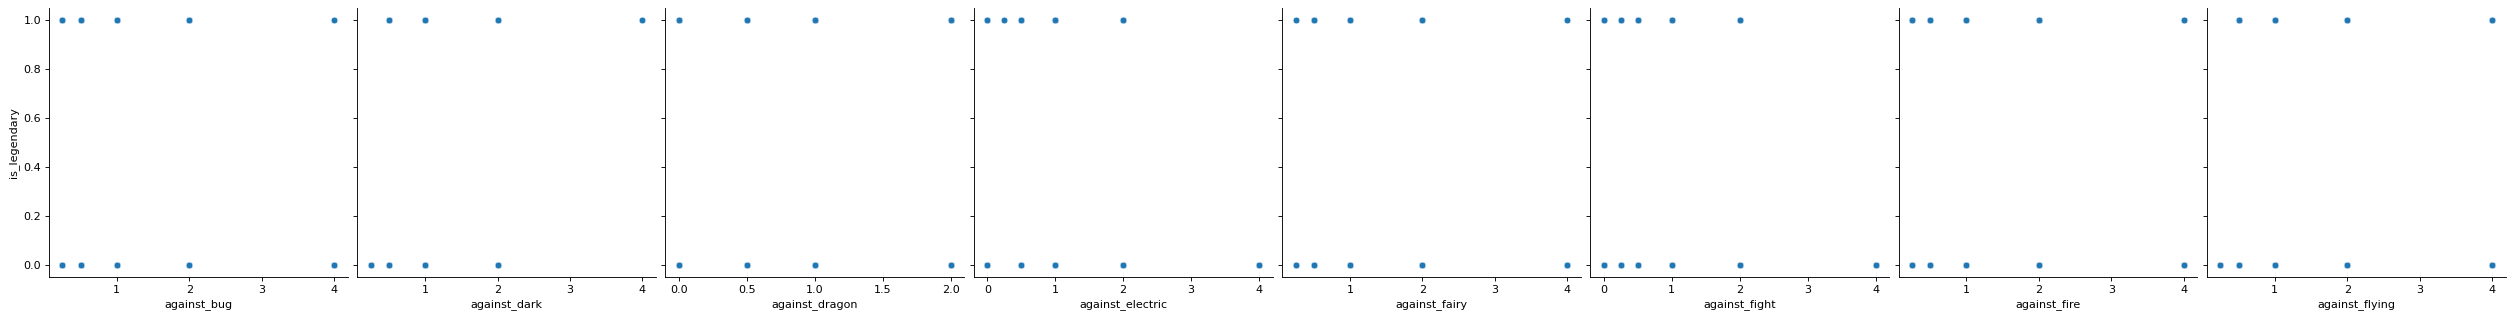

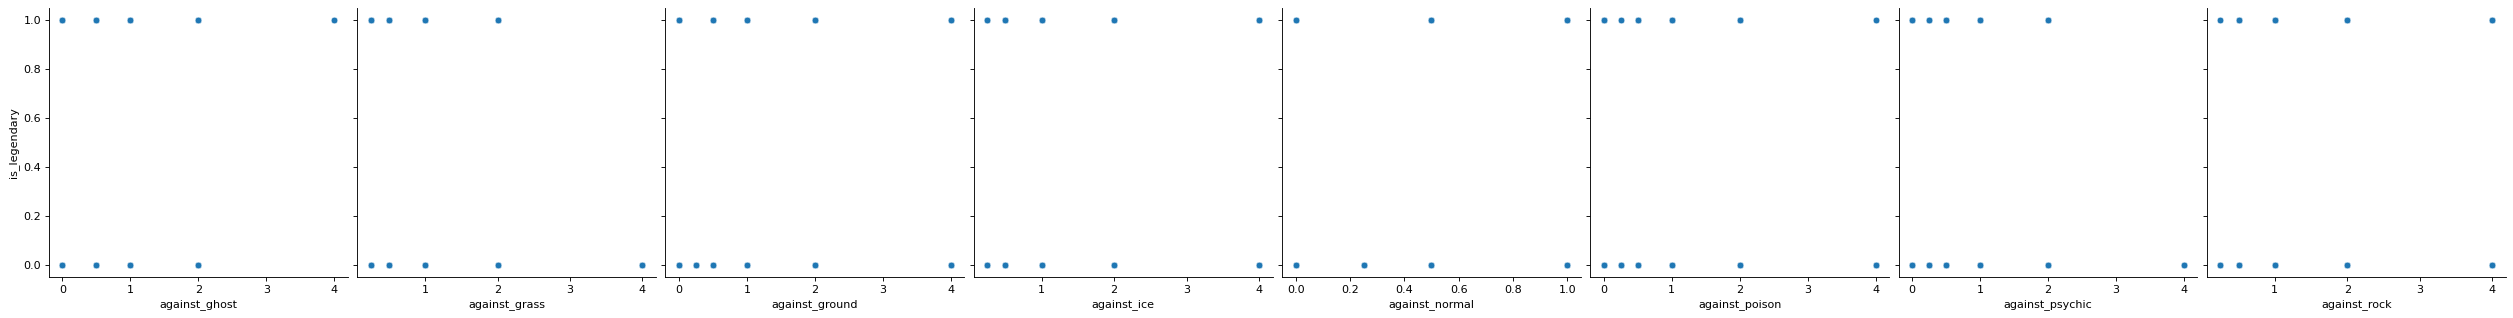

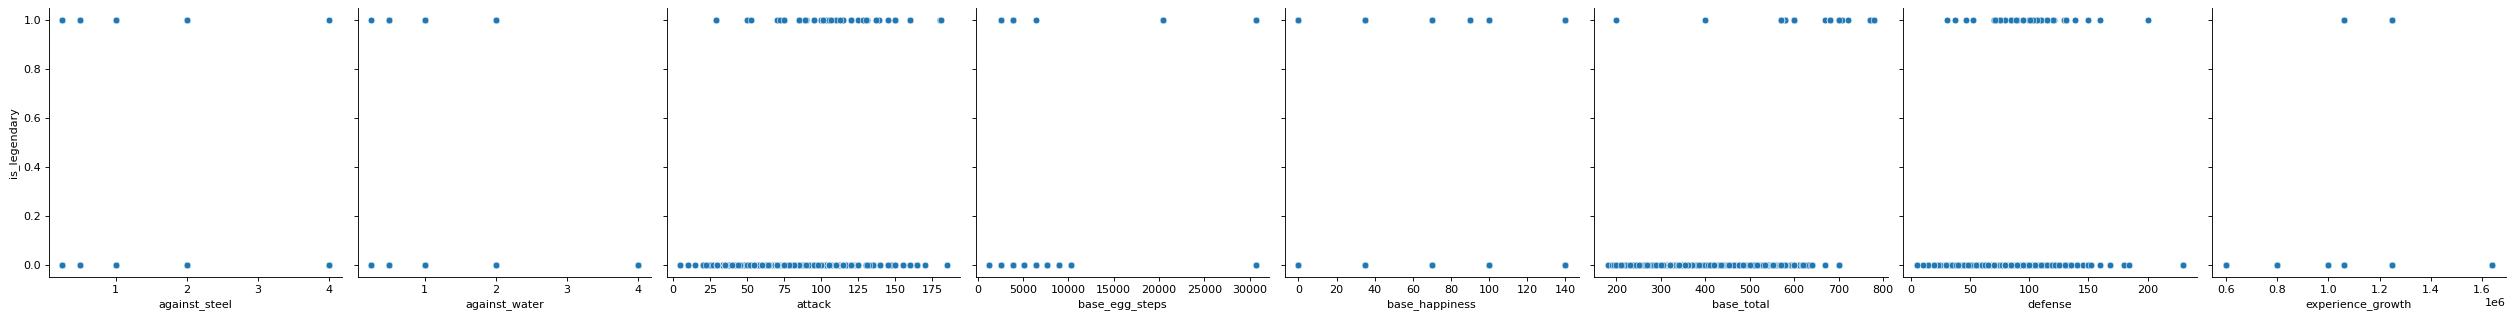

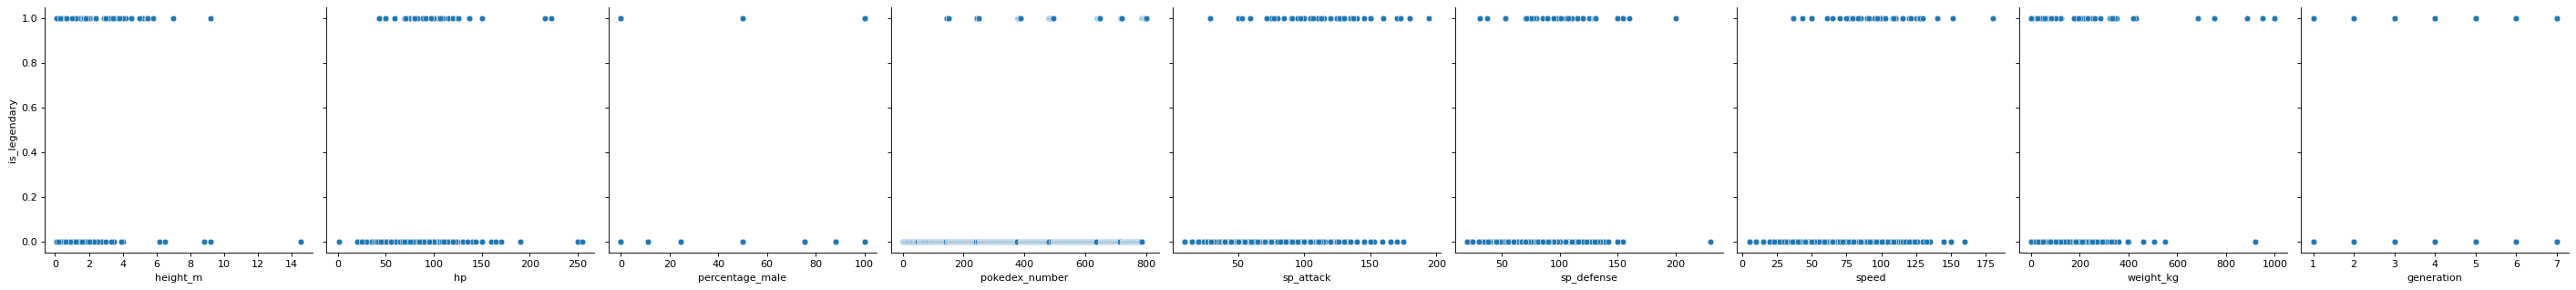

In [91]:
numeric_columns = df.select_dtypes(include='number').columns.drop('is_legendary')

chunk_size = len(numeric_columns) // 4
chunk1 = numeric_columns[:chunk_size]
chunk2 = numeric_columns[chunk_size:chunk_size * 2]
chunk3 = numeric_columns[chunk_size * 2:chunk_size * 3]
chunk4 = numeric_columns[chunk_size * 3:]

sns.pairplot(df, y_vars=['is_legendary'], x_vars=chunk1, dropna=True, height=4)
sns.pairplot(df, y_vars=['is_legendary'], x_vars=chunk2, dropna=True, height=4)
sns.pairplot(df, y_vars=['is_legendary'], x_vars=chunk3, dropna=True, height=4)
sns.pairplot(df, y_vars=['is_legendary'], x_vars=chunk4, dropna=True, height=4)


There seems to be no correlation between the (numeric) variables. Let's do a heatmap to check it out.

<Axes: >

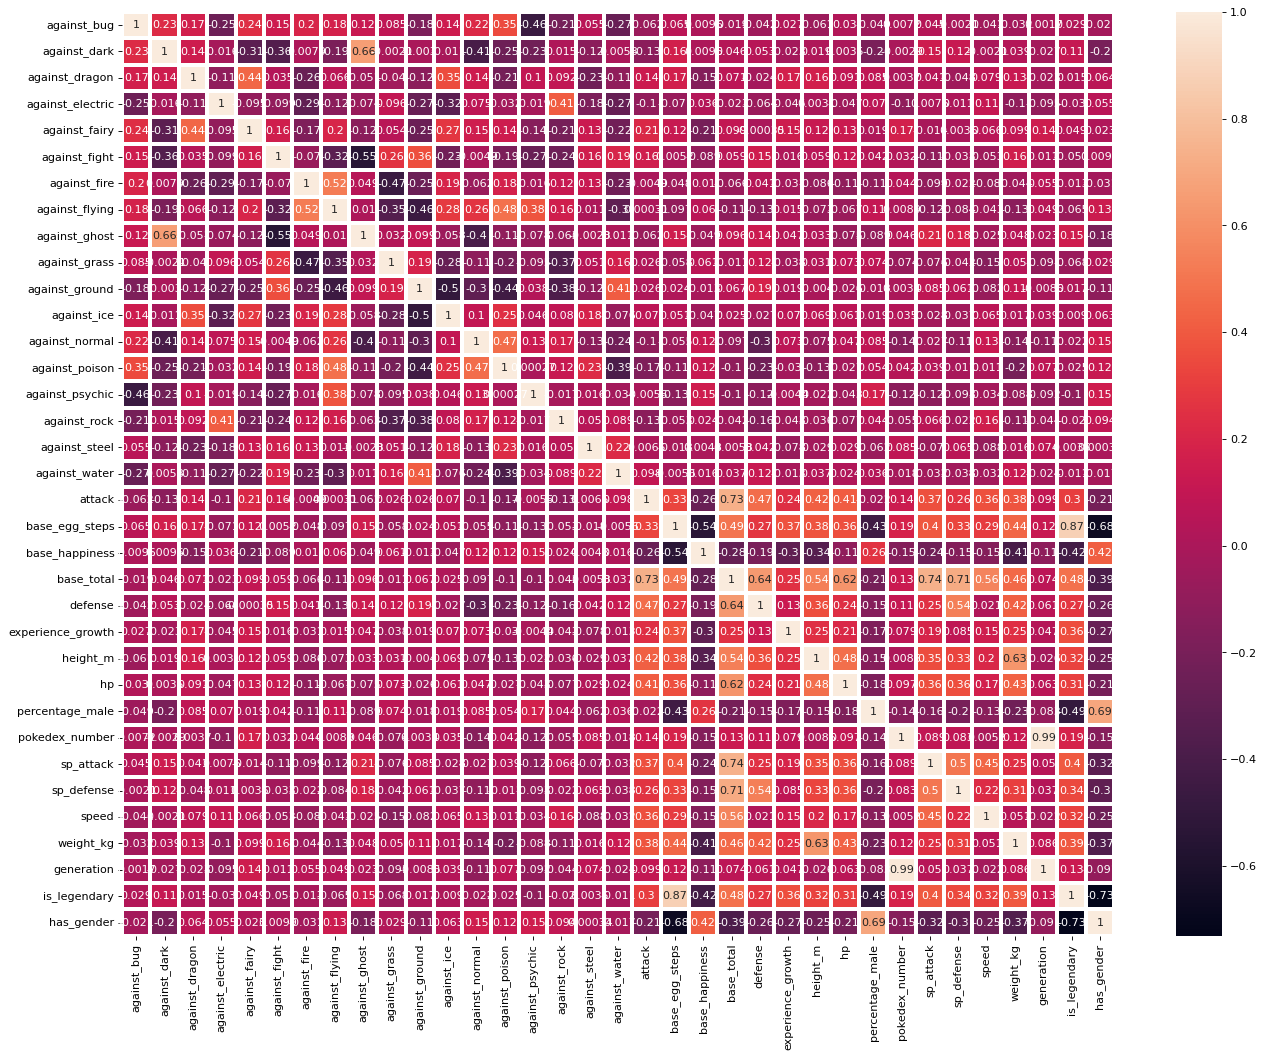

In [92]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=2)

Here we see many correlations. Looking at our target, we see we have a 0.87 correlation with 'base_egg_steps', and a 0.49 correlation with 'base_total' (among others). Additionally, we can see that all the correlations with the 'against_X' variables are very low, so these columns should not be important in our model

Looking at our heatmap, which should include all of the numeric variables, we can see that there is a numerical column missing ('capture_rate'). Let's see why:

In [93]:
col = 'capture_rate'
unique_values = df[col].nunique()
if df[col].dtype == 'object':
    print(f"'{col}' is Categorical")
else:
    print(f"'{col}' is Continuous")

'capture_rate' is Categorical


Let's look at all the unique values that we have in this column to see what is the problem

In [94]:
print(df['capture_rate'].unique())

['45' '255' '120' '90' '190' '235' '150' '25' '170' '50' '75' '200' '100'
 '180' '60' '225' '30' '35' '3' '65' '70' '127' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


We have a Pokémon which has a variable capture rate depending on its form! To solve this issue, we will "split" this Pokémon, creating a row for each form. 

In [95]:
for index, row in df[df['capture_rate'].str.contains(r'\(')].iterrows():
    capture_rate_values = row['capture_rate'].split('(')  # Split based on '('
    capture_rate1 = capture_rate_values[0].strip()
    capture_rate2 = capture_rate_values[1].split(')')[0].strip()
    
    # Create two new rows with adjusted 'name' and 'capture_rate'
    new_row1 = row.copy()
    new_row1['capture_rate'] = capture_rate1
    new_row1['name'] = row['name'] + ' (' + capture_rate1 + ')'

    new_row2 = row.copy()
    new_row2['capture_rate'] = capture_rate2
    new_row2['name'] = row['name'] + ' (' + capture_rate2 + ')'

    # Drop the original row and append the new rows
    df = df.drop(index)
    df = pd.concat([df, pd.DataFrame([new_row1, new_row2])], ignore_index=True)



print(df['capture_rate'].unique())
deoxys_rows = df[df['name'].str.contains('Deoxys', na=False)]
print(deoxys_rows)



KeyboardInterrupt: 